In [86]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import timedelta

C:\Users\joe.barcus\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\joe.barcus\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\joe.barcus\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\joe.barcus\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\joe.barcus\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()

In [21]:
import pandas as pd
import numpy as np

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [23]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [24]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
measurements = Base.classes.measurements

In [25]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
stations = Base.classes.stations

In [26]:
session = Session(engine)

In [27]:
#query for the date and precipitation
sel = [measurements.date,
      measurements.prcp]
annual_precipitation = session.query(*sel).order_by(measurements.date).all()

In [28]:
#convert query to df
annual_precipitation_df = pd.DataFrame(np.array(annual_precipitation).reshape(len(annual_precipitation),2), columns = list('ab'))

In [29]:
#convert the prcp to a number so you can add properly
annual_precipitation_df[['b']] = annual_precipitation_df[['b']].apply(pd.to_numeric)

In [30]:
#use groupby to get total rain by day
total_precip = annual_precipitation_df.groupby(['a']).sum()['b']

In [31]:
#change series back to df with total rain
total_precip = total_precip.to_frame()

In [32]:
total_precip.reset_index(inplace=True)

In [33]:
total_precip.head()

,a,b
0,2010-01-01,1.06
1,2010-01-02,0.02
2,2010-01-03,0.00
3,2010-01-04,0.01
4,2010-01-05,0.03


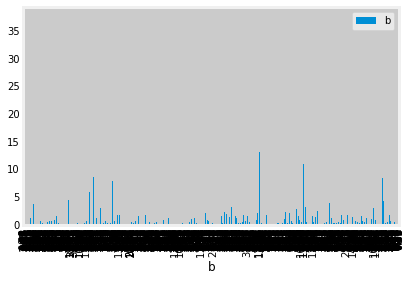

In [53]:
total_precip.plot.bar(x = total_precip['b'])
plt.show()

In [35]:
total_precip.describe()

,b
count,2792.000000
mean,1.041594
std,2.224333
min,0.000000
25%,0.060000
50%,0.380000
75%,1.130000
max,37.410000


In [36]:
#query for the date and precipitation
sel = [func.count(stations.station)]
total_stations = session.query(*sel).all()

In [37]:
total_stations

[(9)]

In [57]:
sel = [measurements.station, func.count(measurements.station)]
station_obs = session.query(*sel).group_by(measurements.station).order_by(func.count(measurements.station)).all()

In [39]:
#USC00519281 has the most observations
station_obs

[('USC00518838', 342),
 ('USC00517948', 683),
 ('USC00511918', 1932),
 ('USC00514830', 1937),
 ('USC00516128', 2484),
 ('USC00519523', 2572),
 ('USC00519397', 2685),
 ('USC00513117', 2696),
 ('USC00519281', 2772)]

In [73]:
sel = [func.avg(measurements.tobs), func.count(measurements.station)]
tobs_obs = session.query(*sel).group_by(measurements.station).all()

In [74]:
tobs_obs

[(71.52743271221532, 1932),
 (72.67804154302671, 2696),
 (74.8131130614352, 1937),
 (70.86513687600645, 2484),
 (74.58711566617862, 683),
 (72.67543859649123, 342),
 (71.66378066378067, 2772),
 (74.56424581005587, 2685),
 (74.53265940902021, 2572)]

In [76]:
tobs_obs_df = pd.DataFrame(np.array(tobs_obs).reshape(len(tobs_obs),2), columns = list('ab'))

In [77]:
tobs_obs_df.head()

,a,b
0,71.527433,1932.0
1,72.678042,2696.0
2,74.813113,1937.0
3,70.865137,2484.0
4,74.587116,683.0


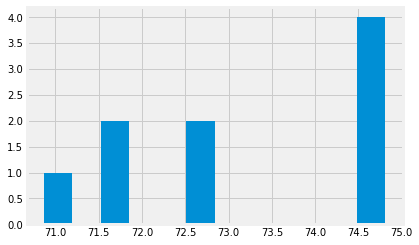

In [79]:
plt.hist(tobs_obs_df['a'], bins=12)
plt.show()

In [ ]:
def calc_temps():
    start_date = input('Enter start date')
    end_date = input('Enter end date')
    return start_date, end_date

def end_date():
    end_date = input('Enter end date')
    return end_date

In [ ]:
sel = [func.avg(measurements.tobs), func.min(measurements.tobs), func.max(measurements.tobs)]

trip_rain = session.query(*sel).filter(func.strftime(%Y-%m-%d") == calc_temps).all()